<a href="https://colab.research.google.com/github/apriandito/bigdata-unsri/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load Packages**


In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Modul
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Import Data**


In [2]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/apriandito/bigdata-unsri/main/data/income-spend.csv', delimiter=";")

### **Eksplorasi Data**

In [3]:
# Menampilkan 5 baris teratas data
df.head(5)

,Customer,Income,Spending
0,1,126,173
1,2,131,115
2,3,141,175
3,4,149,125
4,5,149,126


In [4]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Customer  286 non-null    int64
 1   Income    286 non-null    int64
 2   Spending  286 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [5]:
# Lihat Deskriptif Statistik
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer,286.0,143.500000,82.705300,1.0,72.25,143.5,214.75,286.0
Income,286.0,244.772727,49.877261,126.0,209.00,236.5,276.75,417.0
Spending,286.0,149.111888,23.163221,71.0,132.00,152.0,166.00,202.0


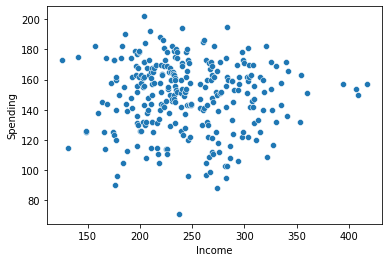

In [6]:
# Visualisasi Data
sns.scatterplot(data= df, 
                x='Income',
                y='Spending')

### **Mencari Jumlah Cluster Optimal**

In [13]:
# Ubah ke Numpy Array
income_spending = df.to_numpy()

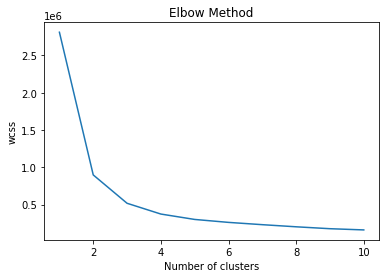

In [14]:
# Elbow Method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income_spending)
    wcss.append(kmeans.inertia_)
  
# Visualize Elbow
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
# Silhoutte Method
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income_spending)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income_spending, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5528402807654098
For n_clusters=3, The Silhouette Coefficient is 0.473458217949722
For n_clusters=4, The Silhouette Coefficient is 0.4193274645282076
For n_clusters=5, The Silhouette Coefficient is 0.37409731930232604
For n_clusters=6, The Silhouette Coefficient is 0.352128583240946
For n_clusters=7, The Silhouette Coefficient is 0.3450554488613663
For n_clusters=8, The Silhouette Coefficient is 0.3520184394200736
For n_clusters=9, The Silhouette Coefficient is 0.36263116802555373
For n_clusters=10, The Silhouette Coefficient is 0.35033116706172973


### **K-Means Clustering**

In [16]:
# K-Means Clustering dengan K = 2
kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit_predict(income_spending)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [17]:
# Menambahakan informasi cluster ke data awal
df['Cluster'] = cluster

# Menampilkan 5 baris teratas data
df.head(5)

,Customer,Income,Spending,Cluster
0,1,126,173,0
1,2,131,115,0
2,3,141,175,0
3,4,149,125,0
4,5,149,126,0


### **Visualisasi Cluster**

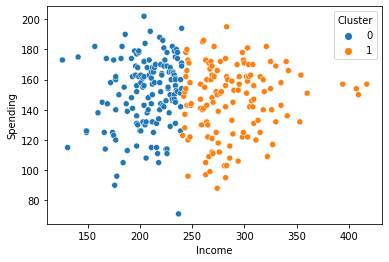

In [18]:
# Visualisasi Cluster
sns.scatterplot(data = df,
                x= "Income",
                y="Spending", 
                hue = "Cluster")